In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
data = pd.read_csv('exams.csv')

for column in data.columns:
  missing = np.mean(data[column].isna()*100)
  print(f" {column} : {round(missing,1)}%")

Dup_Rows = data[data.duplicated()]
print("Повторяющиеся строки : \n {}".format(Dup_Rows))

data.drop_duplicates(keep = 'first', inplace = True)

Dup_Rows = data[data.duplicated()]
print("Повторяющиеся строки : \n {}".format(Dup_Rows))

data.describe()

 gender : 0.0%
 race/ethnicity : 0.0%
 parental level of education : 0.0%
 lunch : 0.0%
 test preparation course : 0.0%
 math score : 0.0%
 reading score : 0.0%
 writing score : 0.0%
Повторяющиеся строки : 
     gender race/ethnicity parental level of education     lunch  \
825   male        group E          associate's degree  standard   

    test preparation course  math score  reading score  writing score  
825               completed         100            100            100  
Повторяющиеся строки : 
 Empty DataFrame
Columns: [gender, race/ethnicity, parental level of education, lunch, test preparation course, math score, reading score, writing score]
Index: []


,math score,reading score,writing score
count,999.000000,999.000000,999.000000
mean,66.362362,68.970971,67.705706
std,15.373794,14.711935,15.575322
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.000000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


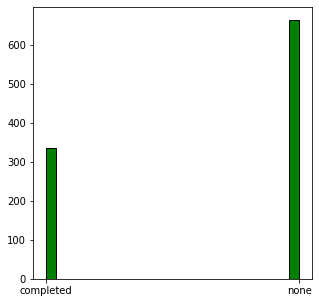

none         665
completed    335
Name: test preparation course, dtype: int64

In [ ]:
data = pd.read_csv('exams.csv')
fig, ax = plt.subplots(figsize = (5, 5))
ax.hist(data['test preparation course'], edgecolor = 'black', color='green', bins=25)
plt.show()
data['test preparation course'].value_counts()

In [ ]:
def preparingData():
  data = pd.read_csv('exams.csv')
  deletedIndex = 0
  for index, row in data.iterrows():
    if "none" in data['test preparation course'][index]:
      data.drop([index], inplace=True)
      deletedIndex=deletedIndex+1
    if deletedIndex==330:
      break
  return data

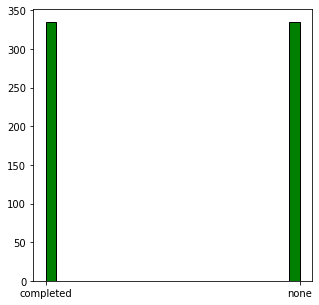

completed    335
none         335
Name: test preparation course, dtype: int64

In [ ]:
w = preparingData()

fig, ax = plt.subplots(figsize = (5, 5))
ax.hist(w['test preparation course'], edgecolor = 'black', color='green', bins=25)
plt.show()
w['test preparation course'].value_counts()

In [ ]:
dataX = preparingData()
dataX.drop(['gender','race/ethnicity','parental level of education','lunch','test preparation course'], axis = 1, inplace=True)

dataX

,math score,reading score,writing score
0,67,67,63
4,78,73,68
7,93,88,84
10,99,83,85
11,80,87,90
...,...,...,...
995,73,70,65
996,85,91,92
997,32,35,41
998,73,74,82


In [ ]:
dataY = preparingData()
dataY.drop(['gender', 'race/ethnicity','parental level of education','lunch', 'math score', 'reading score', 'writing score'], axis = 1, inplace=True)
dataY

dataY['test preparation course'].value_counts()

completed    335
none         335
Name: test preparation course, dtype: int64

In [ ]:
time_start = time.time()
x_train, x_test, y_train, y_test = train_test_split(dataX, dataY, train_size=0.8, shuffle=True, random_state=271)

model = LogisticRegression(random_state=271)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

print ('Время логистической регрессии: ', time.time()-time_start)
print(x_train.shape(), x_test.shape(), y_train.shape(), y_test.shape())

Время логистической регрессии:  0.01879572868347168


In [ ]:
plt.rcParams['figure.figsize'] = (10, 10)
fig = px.imshow(confusion_matrix(y_test, y_predict), text_auto=True)
fig.update_layout(xaxis_title='Traget', yaxis_title='Prediction')

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

   completed       0.62      0.61      0.62        62
        none       0.67      0.68      0.68        72

    accuracy                           0.65       134
   macro avg       0.65      0.65      0.65       134
weighted avg       0.65      0.65      0.65       134



In [ ]:
time_start = time.time()

param_kernel = ('linear', 'rbf', 'poly', 'sigmoid')
parameters = {'kernel':param_kernel}
model=SVC()
grid_search_svm = GridSearchCV(estimator=model, param_grid=parameters, cv=6)
grid_search_svm.fit(x_train, y_train)

print ('Время SVM: ', time.time()-time_start)

Время SVM:  4.718932151794434


In [ ]:
best_model = grid_search_svm.best_estimator_
best_model.kernel

svm_preds = best_model.predict(x_test)
print(classification_report(y_test, svm_preds))

              precision    recall  f1-score   support

   completed       0.63      0.77      0.70        62
        none       0.76      0.61      0.68        72

    accuracy                           0.69       134
   macro avg       0.70      0.69      0.69       134
weighted avg       0.70      0.69      0.69       134



In [ ]:
plt.rcParams['figure.figsize'] = (10, 10)
fig = px.imshow(confusion_matrix(y_test, svm_preds), text_auto=True)
fig.update_layout(xaxis_title='Traget', yaxis_title='Prediction')

In [ ]:
time_start = time.time()

number_of_neighbors = np.arange(3, 10)
model_KNN = KNeighborsClassifier()
params = {"n_neighbors":number_of_neighbors}

grid_search = GridSearchCV(estimator=model_KNN, param_grid=params, cv=6)

grid_search.fit(x_train, y_train)

print ('Время KNN: ', time.time()-time_start)

print(grid_search.best_score_)

print(grid_search.best_estimator_)

knn_preds = grid_search.predict(x_test)

print(classification_report(y_test, knn_preds))

Время KNN:  0.4140462875366211
0.6230337078651685
KNeighborsClassifier(n_neighbors=3)
              precision    recall  f1-score   support

   completed       0.53      0.50      0.52        62
        none       0.59      0.62      0.61        72

    accuracy                           0.57       134
   macro avg       0.56      0.56      0.56       134
weighted avg       0.57      0.57      0.57       134



In [ ]:
plt.rcParams['figure.figsize'] = (10, 10)
fig = px.imshow(confusion_matrix(y_test, knn_preds), text_auto=True)
fig.update_layout(xaxis_title='Traget', yaxis_title='Prediction')